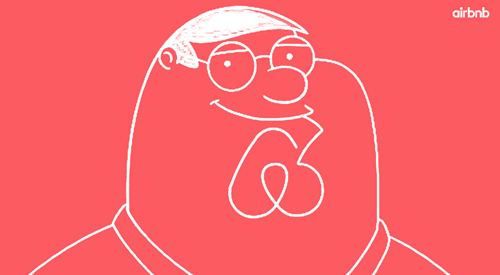

# **Problem Formulation**

## **Problem Definition**

Problem here is about building a model to classify the price and type.

Input: summary and image (7627) for a training dataset. 

Output: price and type (7627) .


## **Data mining function**
- load the data from the source.
- preprocess and manipulating the data.
- build and train the model.
- classification and prediction.

## **Impact**
- It will help hosts to put the true and suitable price for their residence place and that will increase their sales, also it will help guests to predict the night price for the place that they are looking for it to stay in it at holidays or in the work trip days.


## **Challengs:**

- Null values in summary feature in training dataset.
- summary feature in both training dataset and test dataset is multilingual.
- imbalanced labels distribution.
- multi-prediction problem.
- huge time in training and prediction.

##  **The ideal solution**

using the embedding layer for text data with conv2d layer and maxpooling layer for the image data that gote the highest score on kaggle (68.206%).




# **Part 1: Data preparation and Preprocessing**



**Install & Import Libraries**

In [ ]:
!pip install tqdm
from tqdm import tqdm


In [ ]:
!pip install googletrans==3.1.0a0 --user
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=9773a294749ee138af9372dfae95b018205f4cad2766a5da0894f091a47105d5
  Stored in directory: /root/.cache/pip/wheels/61/f7/ef/4d5c03c448eb8583bc063caca7e8802d8801af40c65e9b8022
Successfully built googletrans
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import re
import string
from string import punctuation
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import os
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, LSTM,Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout



**Loading the data**

In [ ]:
#load training data
train= pd.read_csv("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv")
#load testing data
test= pd.read_csv("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv")

In [ ]:
train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [ ]:
test

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg


**some visualization for target columns**

<AxesSubplot:xlabel='count', ylabel='price'>

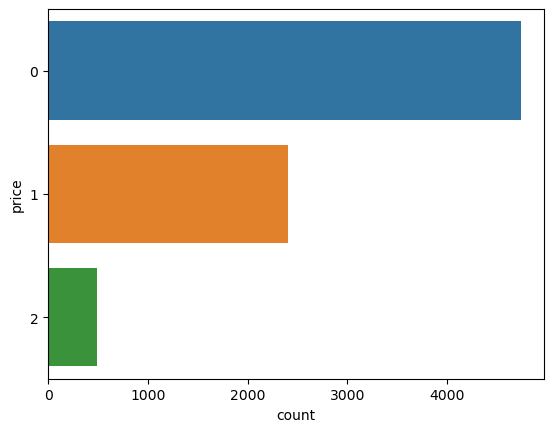

In [ ]:
#plot price column
sns.countplot(y="price", data = train)

<AxesSubplot:xlabel='count', ylabel='type'>

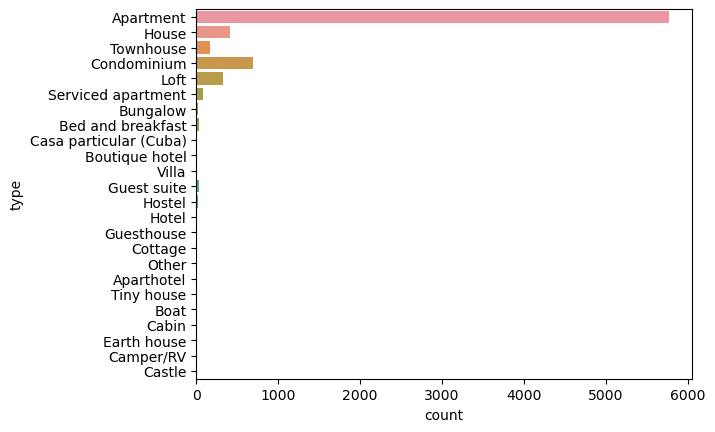

In [ ]:
#plot type column
sns.countplot(y="type", data = train)

**Encoding target columns**

In [ ]:
#categorical encoding for target column
train['type'] = train.type.astype('category').cat.codes
#get target columns length
len_type = len(train.type.unique())
len_price=len(train.price.unique())


In [ ]:
#after encoding
train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0


## **Text preprocessing**

**Explore the summary column 👀**

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2f925dcafb8453be5c4d80d7b40ea65c100bc611eb2504b24a658929227dfc6d
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect


**Detecting the lanuages in the summary**

In [ ]:
from langdetect import detect

# function to detect language of text
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# apply the function to the 'text' column and create a new column 'language'
train['language'] = train['summary'].apply(detect_language)

# print the resulting DataFrame
print(train['language'])


0       en
1       en
2       fr
3       en
4       fr
        ..
7622    fr
7623    en
7624    en
7625    en
7626    en
Name: language, Length: 7627, dtype: object


In [ ]:
#print the languages we got
train['language'].unique()

array(['en', 'fr', 'unknown', 'zh-cn', 'ko', 'es', 'nl', 'de', 'af', 'da',
       'ro', 'pt', 'vi', 'id'], dtype=object)

In [ ]:
train['language'].nunique()

14

**We have 14 different languages**

 **what about the unknown ones ❓**

**I think it may be nulls 🤔**

**so let's check 🏃**

In [ ]:
# check for nulls
train.isnull().sum().sum()

301

In [ ]:
# shape before dropping null values
train.shape

(7627, 5)

In [ ]:
#dropping the nulls
train.dropna(inplace=True)


In [ ]:
# shape after dropping null values
train.shape

(7326, 5)

In [ ]:
# print the language column
print(train['language'])


0       en
1       en
2       fr
3       en
4       fr
        ..
7622    fr
7623    en
7624    en
7625    en
7626    en
Name: language, Length: 7326, dtype: object


**No unknown languages after dropping the nulls 🙏**

In [ ]:
#languages after dropping the nulls
train['language'].unique()

array(['en', 'fr', 'zh-cn', 'ko', 'es', 'nl', 'de', 'af', 'da', 'ro',
       'pt', 'vi', 'id'], dtype=object)

**Check for duplicates**

In [ ]:
# count duplicates
num_duplicates = train.duplicated().sum()

# print the number of duplicates
print(f"There are {num_duplicates} duplicates in the dataframe.")

There are 0 duplicates in the dataframe.


**Translating the summary column to English**

In [ ]:
%%time
# import google translate API
from googletrans import Translator
#take object from the class translator
translator = Translator()
#apply the translation process on train & test data and put the result in new column('translated_text')
#we got the text part only by adding(.text) to translator object
train['translated_text']= train['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)
test['translated_text']= test['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)

CPU times: user 1min 6s, sys: 6.34 s, total: 1min 13s
Wall time: 10min 46s


In [ ]:
#after adding the translated column
train

,summary,image,type,price,language,translated_text
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1,en,"Spacious, sunny and cozy modern apartment in t..."
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0,en,Located in one of the most vibrant and accessi...
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1,fr,Pretty and cozy accommodation 10 minutes from ...
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1,en,"Beautiful and spacious (1076 sc ft, / 100 mc) ..."
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0,fr,Very large ''rustic'' and very pleasant apartm...
...,...,...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0,fr,"A large 4 and 1/2 apartment, all inclusive, we..."
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2,en,Magnificent condo directly on the river. You w...
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1,en,This apartment is perfect for anyone visiting ...
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0,en,"It is a cozy ,clean ,and comfortable apartment..."


**convert the text to sequences and pad them to a fixed length**

In [ ]:
# import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

# define the vocabulary size and maximum length
vocab_size = 40000
max_len = 100

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train["translated_text"])

# define a function to preprocess the text data
def _preprocess(list_of_text):
    # convert the text to sequences and pad them to a fixed length
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    
# preprocess the training data
x_train_text_id = _preprocess(train["translated_text"])

# print the shape of the preprocessed training data
print(x_train_text_id.shape)


(7326, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['spacious sunny and cozy modern apartment in the heart of montreal this 3 '
 'bedroom centrally located in the very popular plateau mont royal '
 'neighborhood in the middle of prince arthur pedestrian only street close to '
 'all amenities restaurants coffee house bars clubs shopping universities '
 'subway stations experience montreal like a real local resident be in the '
 'heart of the action grand prix week grill saint laurent festival mural 2019 '
 'and so much more',
 'located in one of the most vibrant and accessible locations of downtown '
 'montreal this one bedroom condo will not only impress you but leave you with '
 'one of the most memorable experiences it is walking distance of the popular '
 'sainte catherine street the bell center the old port lachine canal '
 'bonaventure metro and much much more',
 'pretty and cozy accommodation 10 minutes from downtown montreal grocery '
 'store pharmacy saq restaurants and public transport nearby two closed '
 'bedrooms that can a

In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## **Image Preprocessing**

In [ ]:
# preprocess image data

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64)) # read each image as a greyscale image size (64x64x2)
        arr = np.array(image) # convert each image to an array
    except:
        arr = np.zeros((64, 64, 2)) # if an image can't be loaded, return an array of zeros (same size: 64x64x2)
    return arr

In [ ]:
# loading images:
x_image = np.array([load_image(i) for i in tqdm(train.image)]) # load each image from the provided directory using the function created above

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train['summary'].astype('str')

100%|██████████| 7326/7326 [00:00<00:00, 30999.21it/s]


# **Part 2: Model Building , Training ,classification and prediction**

**Function to help in visualizing the models loss and accuracy**

In [ ]:
 def visualization(history):
        # generate a figure containing 3 plots displayed horizontally
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
      fig.suptitle('Model Results')

      # first we display the training price accuracy vs. the validation price accuracy
      ax1.plot(history.history['price_sparse_categorical_accuracy'])
      ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
      ax1.set_title('price accuracy')
      ax1.set_ylabel('accuracy')
      ax1.set_xlabel('epoch')
      ax1.legend(['train_price', 'validation_price'], loc='upper left')

      # same with the other specified accuracy metric, type accuracy
      ax2.plot(history.history['type_sparse_categorical_accuracy'])
      ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
      ax2.set_title('type accuracy')
      ax2.set_ylabel('accuracy')
      ax2.set_xlabel('epoch')
      ax2.legend(['train_type', 'validation_type'], loc='upper left')

      # on the last axis, we plot the training loss against the validation loss (w.r.t. price and type combined)
      ax3.plot(history.history['loss'])
      ax3.plot(history.history['val_loss'])
      ax3.set_title('model loss')
      ax3.set_ylabel('loss')
      ax3.set_xlabel('epoch')
      ax3.legend(['train', 'validation'], loc='upper left')

      plt.show() # display the figure

## **Trial 1**

**Multi-modality learning**

**The model takes in two inputs**: text data and image data.

**1- text data**
- The text data is processed using an embedding layer to generate word embeddings.

- The word embeddings are averaged to obtain a single vector representing the text input.

**2- image data**
- The image data is processed using a convolutional layer followed by max pooling to obtain a flattened feature vector.

**Then**

- The text and image features are **concatenated** together.

**Multi-objective learning**
- The concatenated features are passed through two dense layers, each predicting one of the **two labels: price and type**.
- The model is compiled with an Adam optimizer and sparse categorical cross-entropy loss for both labels, with equal loss weighting.
- The evaluation metric for both labels is sparse categorical accuracy.

In [ ]:
# Define input layers for text and image data
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Embed the text data using an embedding layer
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Average the embedded text data across the sequence length dimension
averaged = tf.reduce_mean(embedded, axis=1)

# Process the image data using a convolutional layer and max pooling layer
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl)

# Concatenate the averaged text data and the flattened image data
fused = tf.concat([averaged, flattened], axis=-1)

# Define output layers for predicted price and type
p_price = Dense(len_price, activation='softmax', name='price')(fused)
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the Keras model with inputs and outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with an optimizer and loss functions for each output
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # Set loss weights to balance the importance of each output
    loss_weights={
        'price': 0.5,
        'type': 0.5,
    },
    # Track accuracy metrics for each output
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 33s 70ms/step - loss: 1.0453 - price_loss: 0.8520 - type_loss: 1.2386 - price_sparse_categorical_accuracy: 0.6174 - type_sparse_categorical_accuracy: 0.7515 - val_loss: 0.8812 - val_price_loss: 0.8124 - val_type_loss: 0.9501 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
367/367 [==============================] - 9s 24ms/step - loss: 0.8891 - price_loss: 0.7966 - type_loss: 0.9816 - price_sparse_categorical_accuracy: 0.6297 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8484 - val_price_loss: 0.7718 - val_type_loss: 0.9249 - val_price_sparse_categorical_accuracy: 0.6583 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
367/367 [==============================] - 5s 14ms/step - loss: 0.8385 - price_loss: 0.7383 - type_loss: 0.9386 - price_sparse_categorical_accuracy: 0.6657 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8065 - val_price_loss: 0.7288

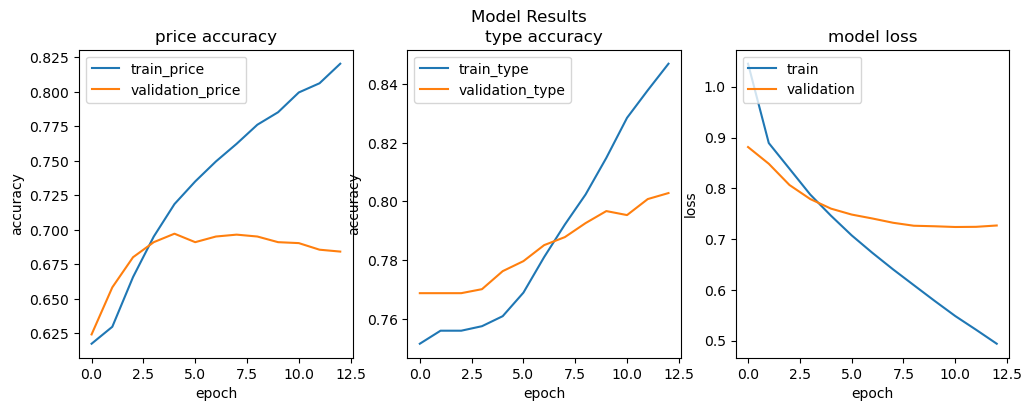

In [ ]:
#visualizing the model loss and accuracy for the two target columns
visualization(history)

In [ ]:
# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test.translated_text.astype('str'))
x_test_image = np.array([load_image(i) for i in tqdm(test.image)]) # load and resize the images from the test set

100%|██████████| 7360/7360 [00:00<00:00, 27492.00it/s]


In [ ]:
#Predict the test data 
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 2ms/step
[[7.8505868e-01 1.7461158e-01 4.0329736e-02]
 [9.5222843e-01 4.0077325e-02 7.6942425e-03]
 [9.3870294e-01 4.2708348e-02 1.8588725e-02]
 ...
 [8.6362034e-01 1.2170496e-01 1.4674743e-02]
 [9.9720228e-01 2.1516727e-03 6.4612535e-04]
 [8.5850108e-01 1.2491243e-01 1.6586410e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_1.csv', index=False)

**Observation 🤔:** the result is good that we don't use any dropout layer or complex model to deal with text data



## **Trial 2: LSTM**

In this trial I just added the **LSTM** Layer for the text data

**because**


The **embedding** layer in an **LSTM** model maps each word to a vector representation, which is then passed through the LSTM layer to capture long-term dependencies in the sequence of words

In [ ]:
# Define input layers for text and image data
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Embed the text data using an embedding layer
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Process the embedded text data using an LSTM layer
lstm = LSTM(50)(embedded)

# Process the image data using a convolutional layer and max pooling layer
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl)

# Concatenate the output of the LSTM layer and the flattened image data
fused = tf.concat([lstm, flattened], axis=-1)

# Define output layers for predicted price and type
p_price = Dense(len_price, activation='softmax', name='price')(fused)
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the Keras model with inputs and outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with an optimizer and loss functions for each output
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # Set loss weights to balance the importance of each output
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # Track accuracy metrics for each output
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
# Define input layers for text and image data
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Embed the text data using an embedding layer
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Process the embedded text data using an LSTM layer
lstm = LSTM(20)(embedded)

# Process the image data using a convolutional layer and max pooling layer
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl)

# Concatenate the output of the LSTM layer and the flattened image data
fused = tf.concat([lstm, flattened], axis=-1)

# Define output layers for predicted price and type
p_price = Dense(len_price, activation='softmax', name='price')(fused)
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the Keras model with inputs and outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with an optimizer and loss functions for each output
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # Set loss weights to balance the importance of each output
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # Track accuracy metrics for each output
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Epoch 1/20
382/382 [==============================] - 23s 51ms/step - loss: 0.9839 - price_loss: 0.8506 - type_loss: 1.1172 - price_sparse_categorical_accuracy: 0.6178 - type_sparse_categorical_accuracy: 0.7564 - val_loss: 0.9502 - val_price_loss: 0.8365 - val_type_loss: 1.0639 - val_price_sparse_categorical_accuracy: 0.6206 - val_type_sparse_categorical_accuracy: 0.7379
Epoch 2/20
382/382 [==============================] - 7s 19ms/step - loss: 0.9227 - price_loss: 0.8417 - type_loss: 1.0037 - price_sparse_categorical_accuracy: 0.6212 - type_sparse_categorical_accuracy: 0.7604 - val_loss: 0.9436 - val_price_loss: 0.8383 - val_type_loss: 1.0489 - val_price_sparse_categorical_accuracy: 0.6206 - val_type_sparse_categorical_accuracy: 0.7379
Epoch 3/20
382/382 [==============================] - 5s 14ms/step - loss: 0.9224 - price_loss: 0.8415 - type_loss: 1.0033 - price_sparse_categorical_accuracy: 0.6212 - type_sparse_categorical_accuracy: 0.7604 - val_loss: 0.9458 - val_price_loss: 0.8348

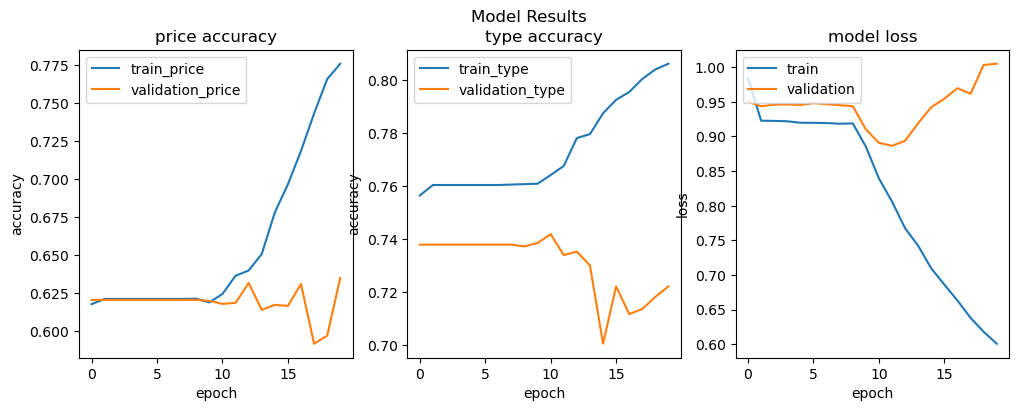

In [ ]:
#visualizing the model loss and accuracy for the two target columns
visualization(history)

In [ ]:
 #Predict the test data
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 4ms/step
[[0.48819274 0.38357884 0.12822846]
 [0.6982306  0.2624856  0.03928377]
 [0.48819166 0.38358235 0.12822597]
 ...
 [0.6982306  0.2624856  0.03928377]
 [0.6982305  0.26248574 0.03928378]
 [0.69823045 0.2624858  0.03928379]]
[0 0 0 ... 0 0 0]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_2.csv', index=False)

**Observation 🤔:** The model seems to have some difficulty with the price output, as the validation accuracy is relatively low (around 0.62) and does not improve much over the 20 epochs, despite the decrease in loss 

so what about adding a dropout layer to help regularize the model to prevent overfitting

## **Trial 3: LSTM and Conv2d with Dropout**



Adding a dropout layer to help regularize the model to prevent overfitting to solve the problem in the last trial .

Reduce the number of LSTMs.

In [ ]:
# Define an embedding layer for the input text data
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# Apply a dropout layer to prevent overfitting
dropout= Dropout(.2)(embedded)
# Apply an LSTM layer to the preprocessed text data
lstm = LSTM(5)(dropout)

# Define a convolutional layer for the input image data
cov = Conv2D(32, (16, 16))(in_image)
# Apply a dropout layer to prevent overfitting
dropout = Dropout(.4)(cov)
# Apply a max pooling layer to reduce the size of the output
pl = MaxPool2D((16, 16))(dropout)
# Flatten the output into a 1D array
flattened = Flatten()(pl)

# Concatenate the output of the LSTM layer and the flattened image data
fused = tf.concat([lstm, flattened], axis=-1)

# Define a fully connected layer for predicting the price
p_price = Dense(len_price, activation='softmax', name='price')(fused)
# Define a fully connected layer for predicting the type
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the model with input layers for the text and image data, and output layers for the price and type predictions
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss for both price and type predictions
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # Set the loss weights to 0.5 for each prediction task
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # Use sparse categorical accuracy as the evaluation metric for both price and type predictions
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 49, 49, 32)   16416       ['input_10[0][0]']               
                                                                                                  
 embedding_11 (Embedding)       (None, 100, 100)     4000000     ['input_9[0][0]']                
                                                                                           

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 10s 27ms/step - loss: 0.9275 - price_loss: 0.8397 - type_loss: 1.0154 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.9926 - val_price_loss: 0.8597 - val_type_loss: 1.1255 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
367/367 [==============================] - 6s 16ms/step - loss: 0.9255 - price_loss: 0.8398 - type_loss: 1.0113 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.9806 - val_price_loss: 0.8485 - val_type_loss: 1.1126 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
367/367 [==============================] - 5s 14ms/step - loss: 0.9246 - price_loss: 0.8391 - type_loss: 1.0100 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.9908 - val_price_loss: 0.8491

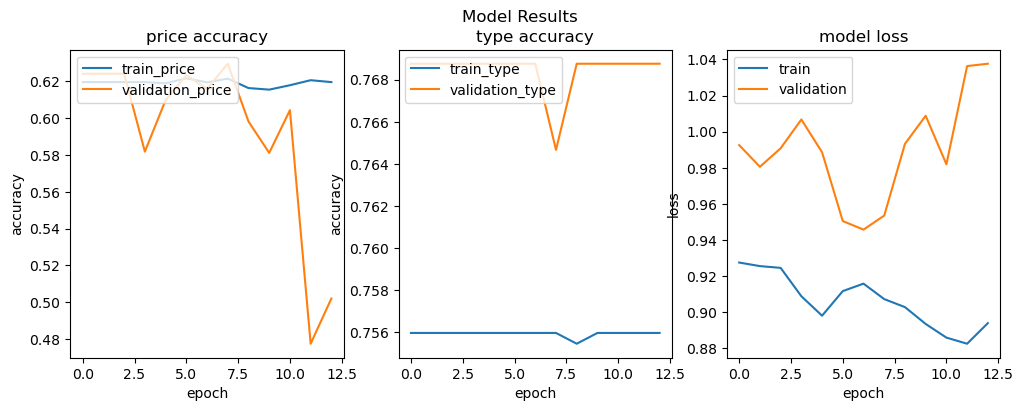

In [ ]:
visualization(history)

In [ ]:
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 4ms/step
[[0.4092673  0.40963686 0.18109587]
 [0.67737985 0.2595435  0.06307664]
 [0.40926674 0.4096368  0.18109642]
 ...
 [0.677381   0.2595427  0.06307636]
 [0.40926942 0.40963703 0.18109354]
 [0.4092704  0.40963703 0.18109253]]
[1 0 1 ... 0 1 1]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_3.csv', index=False)

Observation 🤔: LSTM don't work well with the data and results is not satisfing so i will try GRU.

## **Trial 4:GRU**


GRU has fewer parameters and a simpler architecture than LSTM, which makes it less prone to overfitting and faster to train on small datasets, making it a better choice for text data processing in some cases

In [ ]:
# Create an embedding layer for text input with a vocabulary size of tokenizer.num_words and output dimension of 100
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Apply a GRU layer with 20 units to the embedded text input
gru = GRU(20)(embedded)

# Apply a convolutional layer with 10 filters of size 16x16 and ReLU activation to the image input
cov = Conv2D(10, (16, 16) , activation='relu')(in_image)

# Apply max pooling with a pool size of 16x16 to the convolutional layer output
pl = MaxPool2D((16, 16))(cov)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl)

# Concatenate the output of the GRU layer and the flattened max pooling layer
fused = tf.concat([gru, flattened], axis=-1)

# Apply a dense layer with a softmax activation to predict price
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# Apply a dense layer with a softmax activation to predict type
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the model inputs and outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with Adam optimizer and categorical crossentropy loss for each output
# Also define weights for the loss of each output and accuracy metrics
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 49, 49, 10)   5130        ['input_10[0][0]']               
                                                                                                  
 embedding_13 (Embedding)       (None, 100, 100)     4000000     ['input_9[0][0]']                
                                                                                           

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 42s 47ms/step - loss: 1.0571 - price_loss: 0.8530 - type_loss: 1.2613 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7497 - val_loss: 0.8980 - val_price_loss: 0.8302 - val_type_loss: 0.9658 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
367/367 [==============================] - 7s 18ms/step - loss: 0.9251 - price_loss: 0.8388 - type_loss: 1.0114 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8967 - val_price_loss: 0.8313 - val_type_loss: 0.9621 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
367/367 [==============================] - 6s 15ms/step - loss: 0.9110 - price_loss: 0.8321 - type_loss: 0.9900 - price_sparse_categorical_accuracy: 0.6195 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8657 - val_price_loss: 0.8109

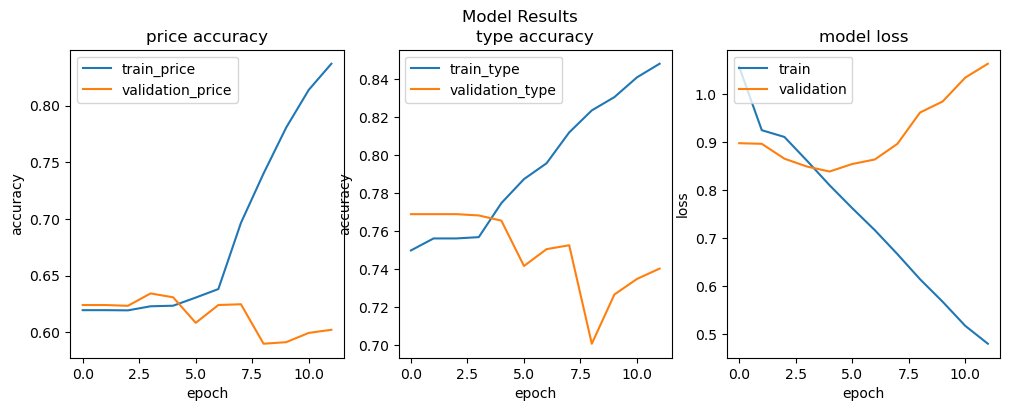

In [ ]:
visualization(history)

In [ ]:
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 3ms/step
[[0.30625772 0.42565894 0.26808336]
 [0.9859633  0.00971501 0.00432166]
 [0.42481235 0.3805098  0.19467792]
 ...
 [0.8468398  0.11582195 0.03733817]
 [0.4706557  0.41997585 0.10936843]
 [0.34472433 0.48602986 0.1692458 ]]
[1 0 0 ... 0 0 1]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_3.csv', index=False)

**Observation 🤔:** It looks like the model is overfitting to the training data, as evidenced by the decreasing performance on the validation set after the first few epochs. The accuracy of the price prediction is not improving significantly, while the accuracy of the type prediction is slightly improving but still plateauing. 

It might be helpful using bidirectional GRU that can reduce overfitting in text data.

## **Trial 5:bidirectional GRU**

- A bidirectional GRU can help alleviate overfitting by considering both past and future context in the input sequence. By processing the sequence in both directions, the model can better capture the underlying patterns and relationships within the data, leading to more accurate predictions on new, unseen data.


- Add More Convolution layers to deal better with the image data.

In [ ]:
# Define an embedding layer with num_words as the input dimension and 100 as the output dimension
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Use a bidirectional GRU layer with 20 units to process the embedded input text
bi_directional = Bidirectional(GRU(20))(embedded)

# Define a 2D convolutional layer with 32 filters of size (3,3) for the input image
cov = Conv2D(32, (3, 3))(in_image)

# Apply max pooling with a pool size of (3,3) to the convolutional layer output
pl = MaxPool2D((3, 3))(cov)

# Apply another convolutional layer with 32 filters of size (2,2) to the max pooling output
cov2 = Conv2D(32, (2,2))(pl)

# Apply max pooling with a pool size of (2,2) to the second convolutional layer output
pl2 = MaxPool2D((2,2))(cov2)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl2)

# Concatenate the output of the bidirectional GRU layer and the flattened output of the max pooling layer
fused = tf.concat([bi_directional, flattened], axis=-1)

# Define a dense layer with len_price units and softmax activation function for predicting price
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# Define a dense layer with len_type units and softmax activation function for predicting product type
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define a model with in_text and in_image as inputs and p_price and p_type as outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    }
)

# Compile the model with Adam optimizer and set the loss and loss weights for the two outputs
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print the summary of the model
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 62, 62, 32)   608         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_5[0][0]']               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 25s 55ms/step - loss: 0.9360 - price_loss: 0.8165 - type_loss: 1.0555 - price_sparse_categorical_accuracy: 0.6154 - type_sparse_categorical_accuracy: 0.7541 - val_loss: 0.8318 - val_price_loss: 0.7594 - val_type_loss: 0.9042 - val_price_sparse_categorical_accuracy: 0.6555 - val_type_sparse_categorical_accuracy: 0.7694
Epoch 2/20
367/367 [==============================] - 8s 21ms/step - loss: 0.7947 - price_loss: 0.7228 - type_loss: 0.8667 - price_sparse_categorical_accuracy: 0.6792 - type_sparse_categorical_accuracy: 0.7647 - val_loss: 0.7758 - val_price_loss: 0.7207 - val_type_loss: 0.8309 - val_price_sparse_categorical_accuracy: 0.6849 - val_type_sparse_categorical_accuracy: 0.7844
Epoch 3/20
367/367 [==============================] - 6s 16ms/step - loss: 0.7134 - price_loss: 0.6531 - type_loss: 0.7737 - price_sparse_categorical_accuracy: 0.7237 - type_sparse_categorical_accuracy: 0.7833 - val_loss: 0.7786 - val_price_loss: 0.7275

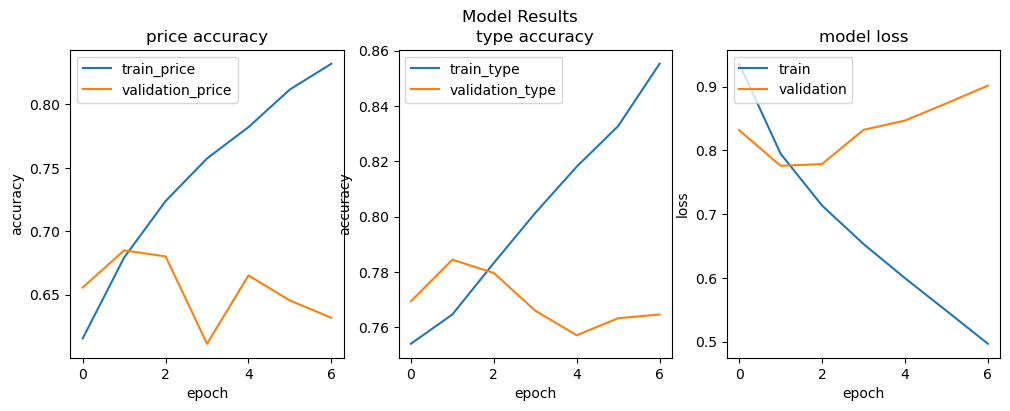

In [ ]:
visualization(history)

In [ ]:
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 2s 5ms/step
[[0.22497635 0.57220155 0.20282206]
 [0.97918427 0.01856223 0.00225349]
 [0.9819727  0.01457994 0.00344735]
 ...
 [0.9117385  0.07400502 0.01425644]
 [0.99256927 0.00628914 0.00114156]
 [0.22684015 0.6979137  0.07524617]]
[1 0 0 ... 0 0 1]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_5.csv', index=False)

**Observation 🤔:** the model overfits again 😢 the data is too simple that don't get good results with  the complex models

so i will return the simple model in the first trial with modification

## **Trial 6 :deeper convolution layer**
the model in the first trial with more dipth convolution layer to get better results with image data.

In [ ]:
# Define input layers for text and image data
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Embed the text data using an embedding layer
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)

# Average the embedded text data across the sequence length dimension
averaged = tf.reduce_mean(embedded, axis=1)

# Define a 2D convolutional layer with 32 filters of size (3,3) for the input image
cov = Conv2D(32, (3, 3))(in_image)

# Apply max pooling with a pool size of (3,3) to the convolutional layer output
pl = MaxPool2D((3, 3))(cov)

# Apply another convolutional layer with 32 filters of size (2,2) to the max pooling output
cov2 = Conv2D(32, (2,2))(pl)

# Apply max pooling with a pool size of (2,2) to the second convolutional layer output
pl2 = MaxPool2D((2,2))(cov2)

# Flatten the output of the max pooling layer
flattened = Flatten()(pl2)


# Concatenate the averaged text data and the flattened image data
fused = tf.concat([averaged, flattened], axis=-1)

# Define output layers for predicted price and type
p_price = Dense(len_price, activation='softmax', name='price')(fused)
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Define the Keras model with inputs and outputs
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compile the model with an optimizer and loss functions for each output
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # Set loss weights to balance the importance of each output
    loss_weights={
        'price': 0.5,
        'type': 0.5,
    },
    # Track accuracy metrics for each output
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

# Print a summary of the model architecture
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 32)   608         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_9[0][0]']               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 18s 46ms/step - loss: 0.9686 - price_loss: 0.8434 - type_loss: 1.0938 - price_sparse_categorical_accuracy: 0.6179 - type_sparse_categorical_accuracy: 0.7534 - val_loss: 0.8775 - val_price_loss: 0.8035 - val_type_loss: 0.9516 - val_price_sparse_categorical_accuracy: 0.6310 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
367/367 [==============================] - 5s 15ms/step - loss: 0.8790 - price_loss: 0.7755 - type_loss: 0.9825 - price_sparse_categorical_accuracy: 0.6486 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8330 - val_price_loss: 0.7565 - val_type_loss: 0.9095 - val_price_sparse_categorical_accuracy: 0.6535 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
367/367 [==============================] - 4s 12ms/step - loss: 0.8108 - price_loss: 0.7087 - type_loss: 0.9130 - price_sparse_categorical_accuracy: 0.6865 - type_sparse_categorical_accuracy: 0.7563 - val_loss: 0.7923 - val_price_loss: 0.7102

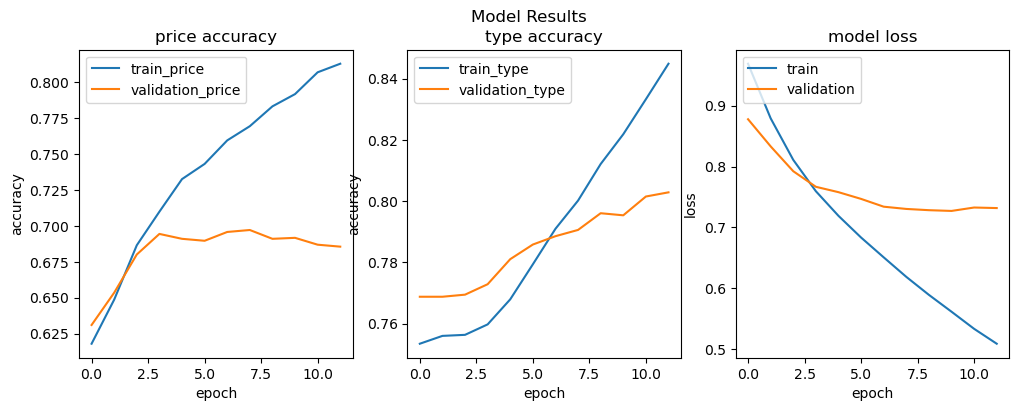

In [ ]:
visualization(history)

In [ ]:
/kaggle/working/submission_1.csv

230/230 [==============================] - 1s 2ms/step
[[7.92623222e-01 1.58013493e-01 4.93632555e-02]
 [9.58516002e-01 3.44504453e-02 7.03347195e-03]
 [9.44124579e-01 3.74251120e-02 1.84502676e-02]
 ...
 [8.72878373e-01 1.10525176e-01 1.65965203e-02]
 [9.98007596e-01 1.47454382e-03 5.17912791e-04]
 [8.54958475e-01 1.26040637e-01 1.90008152e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 2ms/step
[[7.92623222e-01 1.58013493e-01 4.93632555e-02]
 [9.58516002e-01 3.44504453e-02 7.03347195e-03]
 [9.44124579e-01 3.74251120e-02 1.84502676e-02]
 ...
 [8.72878373e-01 1.10525176e-01 1.65965203e-02]
 [9.98007596e-01 1.47454382e-03 5.17912791e-04]
 [8.54958475e-01 1.26040637e-01 1.90008152e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_6.csv', index=False)

**Observation 🤔:** As we see the results is way better than the complex models and also with the test data submission that reached more than 67% on kaggle.

## **Bonus Model:Transfer Learning (VGG19)**

**In this trial i will use VGG 19 as a convolution layer:**

**VGG19** is a convolutional neural network architecture that consists of 19 layers, including convolutional layers with small 3x3 filters and max pooling layers, which leads to a deeper network with a smaller number of trainable parameters. 

In [ ]:
from tensorflow.keras.applications import VGG19

# Define the input layers
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Embed the text input
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# Apply convolution and VGG19 layers to the image input
cov1 = Conv2D(10, (16,16), activation='tanh')(in_image) # 10 number of filters and (16, 16) size of filter
vgg = VGG19(weights=None, input_shape=(49, 49, 10), include_top=False)(cov1)
flattened = Flatten()(vgg)

# Concatenate the text and image features
fused = tf.concat([averaged, flattened], axis=-1)

# Define the output layers
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# Define the model
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# Compile the model
model.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

# Print the model summary
model.summary()


/opt/conda/lib/python3.7/site-packages/keras/applications/vgg19.py:143: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  weights=weights,


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_17 (Conv2D)             (None, 49, 49, 10)   5130        ['input_12[0][0]']               
                                                                                                  
 embedding_14 (Embedding)       (None, 100, 300)     12000000    ['input_11[0][0]']               
                                                                                           

In [ ]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_image
    },
    # our outputs: price and rental type categories
    y={
        'price': train['price'],
        'type': train['type'],
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
367/367 [==============================] - 42s 96ms/step - loss: 1.0699 - price_loss: 0.8500 - type_loss: 1.2898 - price_sparse_categorical_accuracy: 0.6188 - type_sparse_categorical_accuracy: 0.7514 - val_loss: 0.8715 - val_price_loss: 0.8062 - val_type_loss: 0.9367 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
367/367 [==============================] - 17s 46ms/step - loss: 0.8685 - price_loss: 0.7859 - type_loss: 0.9510 - price_sparse_categorical_accuracy: 0.6314 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8266 - val_price_loss: 0.7548 - val_type_loss: 0.8984 - val_price_sparse_categorical_accuracy: 0.6542 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
367/367 [==============================] - 13s 36ms/step - loss: 0.8104 - price_loss: 0.7229 - type_loss: 0.8979 - price_sparse_categorical_accuracy: 0.6758 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.7895 - val_price_loss: 0.71

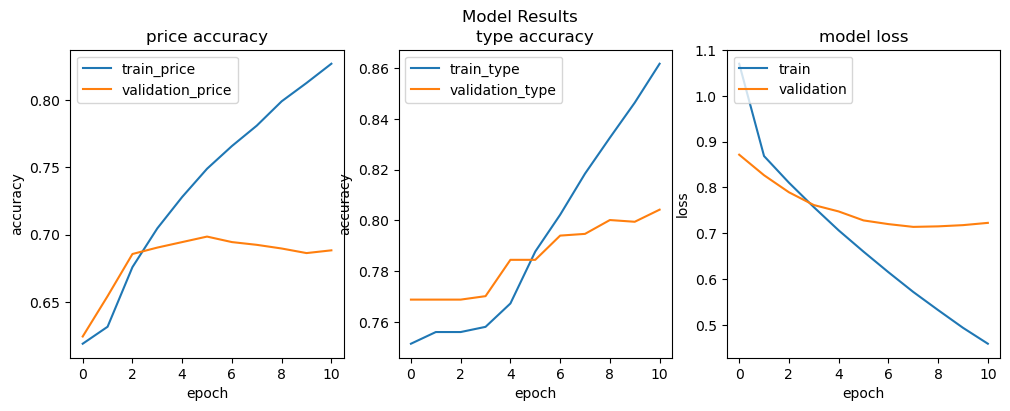

In [ ]:
visualization(history)

In [ ]:
 y_predict = model.predict(
        {
            'summary': x_test_text,
            'image': x_test_image
        }
    )
price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 3s 9ms/step
[[7.3245674e-01 2.1693891e-01 5.0604399e-02]
 [9.2705548e-01 5.6153104e-02 1.6791441e-02]
 [9.0958089e-01 5.9828393e-02 3.0590763e-02]
 ...
 [8.0978590e-01 1.6637978e-01 2.3834242e-02]
 [9.9706739e-01 2.1113078e-03 8.2126760e-04]
 [8.3455527e-01 1.4108074e-01 2.4364036e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
# create csv file for submission

submission1 = pd.DataFrame()

submission1['id'] = test['id']

submission1['price'] = price_category_predicted

submission1.to_csv('submission_bonus.csv', index=False)

**Observation 🤔:** the results is so close to the results in trial 6 which is very good with this data.